# Hands-on

#### Importando bibliotecas

In [117]:
import pandas as pd
import numpy as np
# demais pacotes serão importados, mas vamos adicioná-los à medida que houver necessidade 

#### Adquirindo os dados

Vamos fazer a leitura de nossos dados utilizando Pandas

In [118]:
data = pd.read_csv('bases/forestfires.csv',sep=';')

# Imprimindo as primeiras 5 linhas
data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,NaN,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,NaN,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,NaN,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [119]:
# podemos usar o método info() que é útil para obter uma rápida descrição dos dados, em particular o número de linhas, o tipo de cada 
# atributo e o número de valores não nulos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    491 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


Todos os atributos são ou int ou float, exceto month e day, que é object.

## ToDo 1
Retorne uma Serie que informe os dados presentes na coluna month com a respectiva contagem de quantas vezes esse dado aparece no dataset

In [120]:
# Resposta
data['month'].value_counts()

aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: month, dtype: int64

## ToDo 2
Percebemos que existem alguns meses com valores insignificantes. Remova do dataset as informações sobre os meses cujo valor é menor ou igual a 2

In [121]:
#Resposta
# Percebemos que existem alguns meses com valores insignificantes. Remova do dataset as informações sobre os meses cujo valor é menor ou igual a 2
months_to_mantain = data['month'].value_counts().loc[lambda x: x > 2].index
data = data[data['month'].isin(months_to_mantain)]
data['month'].value_counts()

aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
Name: month, dtype: int64

In [122]:
# O método describe() apresenta um resumo dos atributos numéricos
data.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,486.000000,512.000000,512.000000,512.000000,512.000000
mean,4.671875,4.302734,90.836523,111.835547,552.363477,9.083984,19.017901,44.050781,4.022852,0.021875,12.897598
std,2.320198,1.232372,4.489480,63.597107,245.120680,4.533396,5.797627,15.977888,1.794088,0.297396,63.946316
min,1.000000,2.000000,50.400000,2.400000,7.900000,0.400000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.300000,70.950000,448.375000,6.575000,15.700000,32.750000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.350000,664.500000,8.400000,19.400000,41.500000,4.000000,0.000000,0.545000
75%,7.000000,5.000000,92.900000,142.400000,714.000000,11.000000,22.875000,53.000000,5.025000,0.000000,6.572500
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,99.000000,9.400000,6.400000,1090.840000


## ToDo 3

É possível notar que grande parte da distribuição do atributo meta se concentra numa área de até 6,58 ha (hectares -> 1ha == 10000m²). Use o método cut do Pandas para verificar os agrupamentos de área queimada. Crie uma nova coluna chamada area_cat e utilize os seguintes bins: 0-5, 5-10, 10-50, 50-100, >100. Leve em consideração o valor máximo presente nos dados.

In [123]:
# Resposta
data['area_cat'] = pd.cut(data['area'], bins=[0,5,10,50,100,np.inf], labels=['0-5','5-10','10-50','50-100','>100'])
data['area_cat'].value_counts()

0-5       119
10-50      70
5-10       56
50-100     13
>100       11
Name: area_cat, dtype: int64

Drop a coluna area_cat, pois no vamos utilizá-la mais

In [124]:
data.drop(columns=['area_cat'], inplace=True)
data.head(3)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,NaN,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,NaN,33,1.3,0.0,0.0


## ToDo 4

Use a combinação de Pandas + Matplotlib e retorne um histograma de cada uma das variáveis numéricas presente no dataset

array([[<AxesSubplot:title={'center':'X'}>,
        <AxesSubplot:title={'center':'Y'}>,
        <AxesSubplot:title={'center':'FFMC'}>],
       [<AxesSubplot:title={'center':'DMC'}>,
        <AxesSubplot:title={'center':'DC'}>,
        <AxesSubplot:title={'center':'ISI'}>],
       [<AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'RH'}>,
        <AxesSubplot:title={'center':'wind'}>],
       [<AxesSubplot:title={'center':'rain'}>,
        <AxesSubplot:title={'center':'area'}>, <AxesSubplot:>]],
      dtype=object)

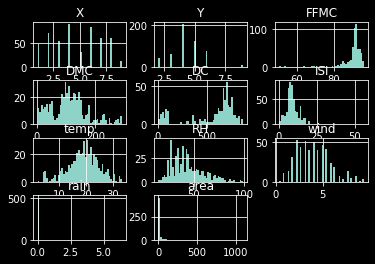

In [125]:
# Resposta
data.hist(bins=50)

## ToDo 5

Seguindo o mesmo procedimento, imprima os boxplots de cada coluna numérica

<AxesSubplot:>

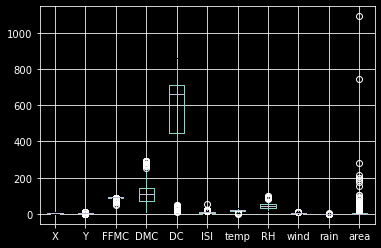

In [126]:
# Resposta
data.boxplot()

## ToDo 6

Calcule a correlação dos atributos descritores com o atributo meta

In [127]:
# Resposta
# Calcule a correlação dos atributos descritores com o atributo meta
data.corr()['rain']

X       0.065443
Y       0.033155
FFMC    0.066911
DMC     0.074572
DC      0.035140
ISI     0.067378
temp    0.072643
RH      0.103466
wind    0.061120
rain    1.000000
area   -0.007426
Name: rain, dtype: float64

Muita coisa interessante a ser observada, mas o atributo rain novamente nos chama a atenção. Podemos confirmar nossa suposição anterior ao verificar que, quanto mais chuva, menos área queimada, e vice versa, já que a correlação é negativa entre esses dois atributos. Podemos afirmar também que quanto maior a temperatura, maior a área queimada. Entetando, os valores de correlação são muito baixos e parecem não explicar totalmente a causa das queimadas (o próprio artigo deixa claro que o problema é muito difícil). 

Há algumas razões:

1) O dataset pode não ser suficientemente grande
2) o dataset pode não ser bom
3) faltam mais atributos para determinar o output

## Preparando os Dados para Algoritmos de Machine Learning

Poderíamos preparar os dados de modo manual, mas é mais interessante fazer isso escrevendo funções, por várias razões:
    -> permite reproduzir essas transformações facilmente em qualquer dataset
    -> gradualmente, você estará construindo sua biblioteca de funções de transformação que poderá ser reusada em projetos futuros.
    -> poderemos usar essas funções em seus sistemas em produção para transformar novos dados antes de inseri-los em seu algoritmo
    -> possibilidade de testar varias transformações e ver qual combinação funciona melhor

## ToDo 7

Crie duas variáveis: features e labels. A primeira vai conter todas as colunas, menos 'area'. A segunda, apenas a coluna área. 

In [128]:
# Resposta
features = data.drop(columns=['area'])
labels = data['area'].copy()

# Scikit-Learn

### Limpeza dos Dados

A maioria dos algoritmos de machine learning não funciona bem com características faltantes, então precisamos criar algumas funções para lidar com elas. 

Olhando nosso dataset, podemos observar alguns valores faltantes para o atributo temp.

In [129]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 512 entries, 0 to 515
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       512 non-null    int64  
 1   Y       512 non-null    int64  
 2   month   512 non-null    object 
 3   day     512 non-null    object 
 4   FFMC    512 non-null    float64
 5   DMC     512 non-null    float64
 6   DC      512 non-null    float64
 7   ISI     512 non-null    float64
 8   temp    486 non-null    float64
 9   RH      512 non-null    int64  
 10  wind    512 non-null    float64
 11  rain    512 non-null    float64
dtypes: float64(7), int64(3), object(2)
memory usage: 52.0+ KB


Para arrumar essa inconsistência, temos três opções:
    -> eleminar as amostras correspondentes
    -> eliminar todo o atributo
    -> ajustar os dados para algum valor (zero, média, mediana, etc.)

In [130]:
# features.dropna(subset=["temp"]) # opção 1
# features.drop("temp", axis=1) # opção 2
# median = features["temp"].median()
# features["temp"].fillna(median) # opção 3

# lembrando que se a opção 3 for escolhida, precisamos tratar os dados tanto no conjunto de treino quanto no conjunto de teste

Scikit_learn provê uma classe para cuidar dos valores faltantes: SimpleImputer. 

Primeiro, precisamos criar uma instância dessa classe, especificando que desejamos substituir cada valor faltante em cada atributo pela mediana desse atributo

In [131]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')

Visto que a mediana só pode ser calculada em atributos numéricos, precisamos criar uma cópia dos dados sem os atributos do tipo objeto

In [132]:
features_num = features.drop(['month','day'],axis=1)

In [133]:
# Agora precisamos ajustar a instância do Imputer aos dados de treinamento usando o método fit():
imputer.fit(features_num)

SimpleImputer(strategy='median')

o imputer calculou a mediana de cada atributo e armazenou o resultado na variável statistics_. Originalmente, apenas o atributo temp possuia valores faltantes, mas não é possível garantir que não haverá valores faltantes quando o sistema entrar em produção. Então, é seguro aplicar imputer para todos os atributos numéricos. 

In [134]:
imputer.statistics_

array([  4.  ,   4.  ,  91.6 , 108.35, 664.5 ,   8.4 ,  19.4 ,  41.5 ,
         4.  ,   0.  ])

Agora, podemos usar esses valores obtidos para substituir valores faltantes pelas medianas aprendidas:

In [135]:
X = imputer.transform(features_num) # o resultado é um numpy.array. Precisamos converter para DataFrame
features_transformed = pd.DataFrame(X, columns=features_num.columns)
features_transformed.head()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,7.0,5.0,86.2,26.2,94.3,5.1,8.2,51.0,6.7,0.0
1,7.0,4.0,90.6,35.4,669.1,6.7,19.4,33.0,0.9,0.0
2,7.0,4.0,90.6,43.7,686.9,6.7,19.4,33.0,1.3,0.0
3,8.0,6.0,91.7,33.3,77.5,9.0,19.4,97.0,4.0,0.2
4,8.0,6.0,89.3,51.3,102.2,9.6,11.4,99.0,1.8,0.0


In [136]:
# podemos confirmar que os valores faltantes foram todos preenchidos
features_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       512 non-null    float64
 1   Y       512 non-null    float64
 2   FFMC    512 non-null    float64
 3   DMC     512 non-null    float64
 4   DC      512 non-null    float64
 5   ISI     512 non-null    float64
 6   temp    512 non-null    float64
 7   RH      512 non-null    float64
 8   wind    512 non-null    float64
 9   rain    512 non-null    float64
dtypes: float64(10)
memory usage: 40.1 KB


### Feature Normalization

Com algumas poucas exceções, algoritmos de machine learning não performam bem quando os atributos numéricos possuem escalas diferentes.

Existem duas abordagens conhecidas para trazer os atributos para uma mesma escala: min-max scaling e standardization. 

min-max scaling (normalization) consiste em subtratir o valor minimo e dividir pela subtração de max por min:

\begin{align}
x = \frac{x - min}{max - min}
\end{align}

Já standardization consiste em subtrair a média(valores sempre terao média zero) e então dividir pela variância de modo que a distribuição resultante possua variância unitária. 

\begin{align}
x = \frac{x - \mu}{\sigma}
\end{align}

Diferentemente de normalization, standardization não leva os números a um intervalo específico, o que pode ser um problema para algoritmos específicos (por exemplo, redes neurais geralmente esperam um valor de entrada entre o intervalo 0-1). Entretanto, standardization é muito menos sensível à outiliers. 

Vamos usar as implementações disponíveis na Scikit-Learn.

### Manipulando Atributos Textuais e Categóricos

Anteriormente, deixamos de lado os atributos categóricos pelo motivo de serem um atributo de texto e, portanto, não é possível calcular sua mediana. Assim, precisamos converter esses rótulos em números. 

Scikit-Learn provê uma ferramenta para isso denominada OrdinalEncoder, que associa um valor para cada categoria. 

In [137]:
# separando apenas atributos categóricos
features_cat = features[['month','day']]

In [138]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
features_cat_1hot = encoder.fit_transform(features_cat)
features_cat_1hot

array([[6., 0.],
       [7., 5.],
       [7., 2.],
       ...,
       [1., 3.],
       [1., 3.],
       [1., 2.]])

### Pipelines de Transformação

Como é possível observar, existem muitos passos no processo de transformação de dados que precisam ser executados na ordem correta. Para isso, Scikit-Learn provê uma classe que auxilia essas sequências de transformações: Pipeline. 

Para os atributos numéricos, podemos escrever um pipeline da seguinte maneira:

In [139]:
from sklearn.pipeline import Pipeline
num_pipeline = Pipeline([
    ('imputer',SimpleImputer(missing_values=np.nan, strategy='median')),
])
features_num_tr = num_pipeline.fit_transform(features_num)

Mas ainda precisamos lidar com os atributos categóricos e, além disso, juntar todo o processo de transformação num único pipeline para obter um único resultado de todos os dados tratados que, em teoria, estariam prontos para um algoritmo de machine learning (obviamente, antes precisariam ser divididos em conjunto de treino e teste - veremos isso adiante). 

Para criar um pipeline que trate tanto atributos numéricos quanto categóricos, podemos usar FeatureUnion. Antes, no entanto, vamos criar uma classe para separar os atributos numéricos e categóricos de nosso dataset original 

## ToDo 8

Complete a classe DataFrameSelector que herde BaseEstimator e TransformerMixin (from sklearn.base import BaseEstimator, TransformerMixin) que implemente 3 métodos:

> __init__: recebe o nome dos atributos

> fit: retorna self

> transform: aciona o atributo values do DataFrame[atributos]

In [140]:
#Resposta
from sklearn.base import BaseEstimator, TransformerMixin
class DataFrameSelector(BaseEstimator,TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

A classe DataFrameSelector irá separar o dataframe de acordo com o conteúdo da variável attribute_names, retornando apenas aquelas que são categórias ou aquelas que são numéricas. Essa classe herda os métodos BaseEstimator e TransformerMixin.

O primeiro é responsável por implementar os métodos get_params() e set_params() que são extremamente úteis quando vamos executar um gridsearch, por exemplo. Com essa classe podemos acessar os valores que estão definidos dentro do método __init__, bem como atribuir novos valores apra ele. 

Já TransformerMixin tras implementado o método fit_transform(), que nada mais é do que aplicar o método fit() e, logo em seguida, o método transform.

Esse link pode ajudar a esclarecer melhor as coisas, caso ainda tenham dúvidas: [link](https://github.com/ageron/handson-ml/issues/391)

#### Normalizacao usando Scikit Learn

In [141]:
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import OrdinalEncoder #skl 0.20>
from sklearn.preprocessing import StandardScaler # MinMaxScaler
num_attribs = list(features_num)
cat_attribs = ['month','day']
num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('imputer', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('std_scaler', StandardScaler()),
])
cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attribs)),
    ('categorial_encoder', OrdinalEncoder())
    ])
full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline),
    ("cat_pipeline", cat_pipeline),
])

In [142]:
features_prepared = full_pipeline.fit_transform(features) #retorna um numpy.array

In [143]:
# Agora temos nossos dados preparados.
features_prepared[0:5,:]

array([[ 1.00439802,  0.56634499, -1.03376282, -1.34784902, -1.87055397,
        -0.87966738, -1.91715323,  0.43535259,  1.4936649 , -0.07362713,
         6.        ,  0.        ],
       [ 1.00439802, -0.24589208, -0.05273545, -1.20304688,  0.47670679,
        -0.52638592,  0.        , -0.69230606, -1.74233662, -0.07362713,
         7.        ,  5.        ],
       [ 1.00439802, -0.24589208, -0.05273545, -1.07241016,  0.5493951 ,
        -0.52638592,  0.        , -0.69230606, -1.51916411, -0.07362713,
         7.        ,  2.        ],
       [ 1.4358173 ,  1.37858206,  0.1925214 , -1.23609954, -1.93915867,
        -0.01854383,  0.        ,  3.31714691, -0.0127496 ,  0.59953517,
         6.        ,  0.        ],
       [ 1.4358173 ,  1.37858206, -0.34258444, -0.95279099, -1.83829343,
         0.11393672, -1.35004782,  3.44244231, -1.24019846, -0.07362713,
         6.        ,  3.        ]])

In [144]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [145]:
X = features_prepared
y = labels.values
split_test_size = 0.30

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=42)

In [147]:
lr_model = linear_model.LinearRegression()
lr_model.fit(X_train, y_train.ravel()) # flatten arrays

LinearRegression()

In [148]:
y_pred = lr_model.predict(X_test)

In [149]:
import math
math.sqrt(mean_squared_error(y_test,y_pred))

88.56467609587406